In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sympy.solvers import solve 
from sympy import Symbol, symbols
import sympy as sm
from sympy import init_session, init_printing
from sympy import *
import argparse 

Vehicle specifications 

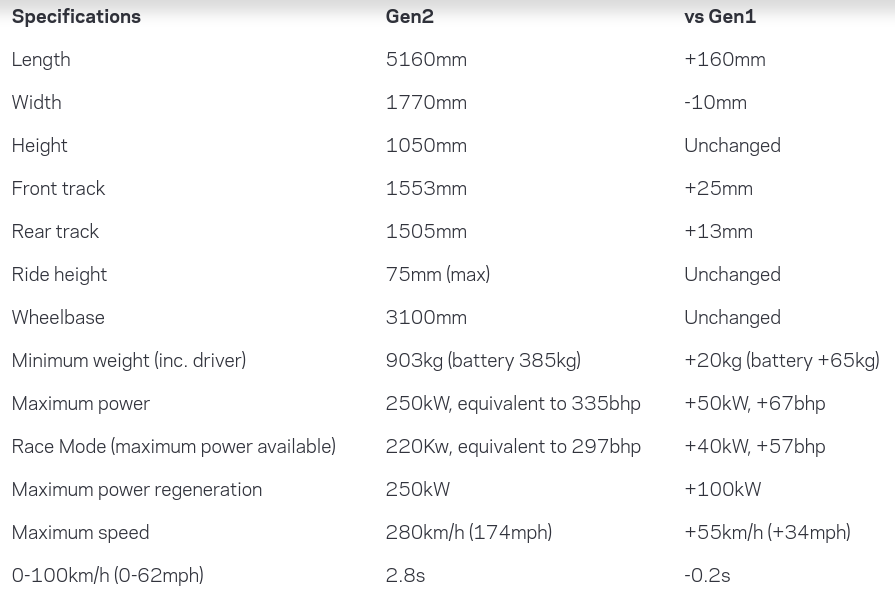

Battery specifications and modelling 

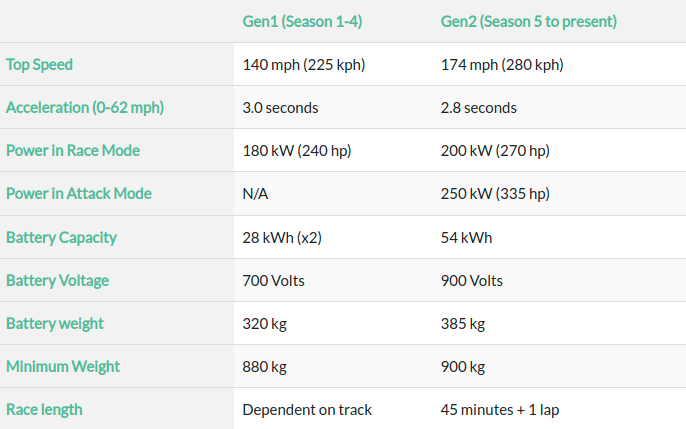

*   Battery mass = 320 kg or 705.5 lbs
*   SOC = 100%
*   Maximum Capacity = 54 kWh
*   Nominal voltage = 900V 
*   Cell capacity = 5000
*   Energy Density = 230 Wh/kg
*   Current Discharge Rate = I
*   Distance travelled = 50 miles 
*   Minimum SOC = SOC 
min
​










In [ ]:
mass = float(input("Enter mass (kg) of battery here (320 for default):"))
max_cap = float(input("Enter battery maximum capacity (kWh) here (54 for default): ")*1000)
nom_volt = float(input("Enter battery nominal voltage here (900V for default): "))
energy_dens = 230
soc_max = 100 
soc_min = int(input("Enter minimum state of charge here (20% for default) :"))

Enter mass (kg) of battery here (320 for default):320
Enter battery maximum capacity (kWh) here (54 for default): 54
Enter battery nominal voltage here (900V for default): 900
Enter minimum state of charge here (20% for default) :20


81.77777777777777


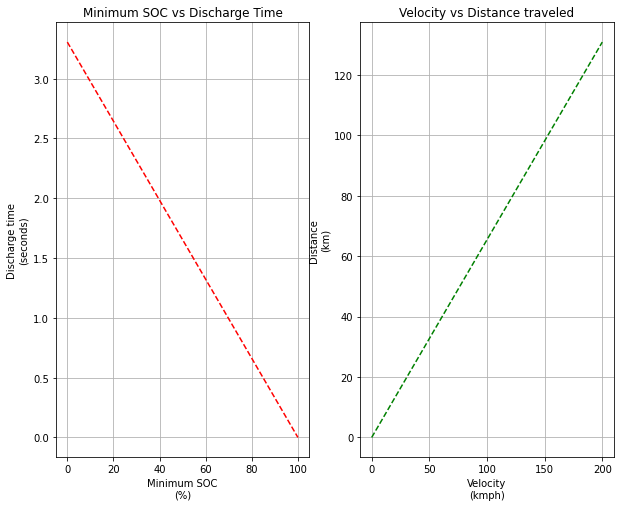

In [ ]:
battery_eng_cap = energy_dens * mass
battery_col_cap = battery_eng_cap / nom_volt

print(battery_col_cap)
t_dis = ((100-soc_min)/100)*(battery_col_cap / 100)


x = np.linspace(0,100,5)
y = ((100-x)/100) * (264.5/80)

v = np.linspace(0,200,10)
d = v * t_dis

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,8))
ax1.plot(x,y, '--', color='red')
ax1.grid(True)
ax1.set(title='Minimum SOC vs Discharge Time', xlabel= 'Minimum SOC\n(%)', ylabel= 'Discharge time\n(seconds)')
ax2.plot(v,d, '--', color = 'g')
ax2.grid(True)
ax2.set(title='Velocity vs Distance traveled', xlabel= 'Velocity\n(kmph)', ylabel= 'Distance\n(km)')
plt.show()

Plots: State of charge vs cruising speed
SOC vs discharge rate
SOC vs distance traveled

Motor Specifications and Modelling 

slip = 0.5 
I = Rotor current 
Pm = Mechanical Power 
Rr = rotor Resistance 

[Text(0, 0.5, 'Mechanical Power\n'),
 Text(0.5, 0, 'Rotor Current\n(Amps)'),
 Text(0.5, 1.0, 'Rotor Current vs Mechanical Power')]

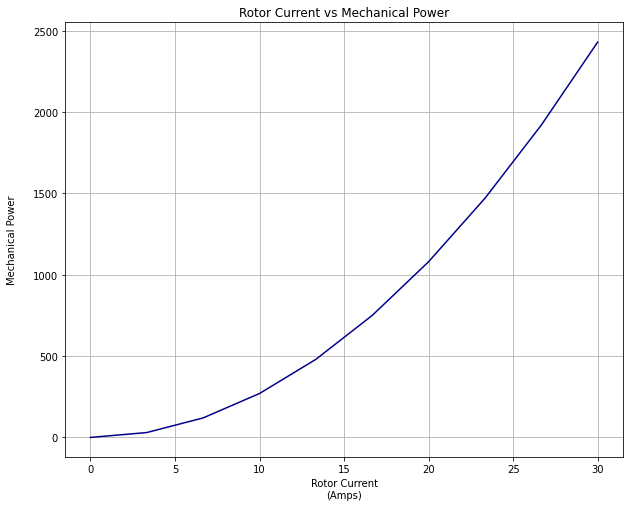

In [ ]:
I = np.linspace(0,30,10)

Pm = 3*((1-0.5)/0.5)*((I)**2)*0.9

fig1,ax = plt.subplots(figsize=(10,8))
ax.plot(I,Pm, '-', color='darkblue')
ax.grid(True)
ax.set(title='Rotor Current vs Mechanical Power', xlabel= 'Rotor Current\n(Amps)', ylabel= 'Mechanical Power\n')


FASTSIM Plots 

In [ ]:
from fastsim import vehicle, cycle, simdrive
import matplotlib.pyplot as plt 


veh = vehicle.Vehicle(21)
print(veh.Scenario_name)

cyc = cycle.Cycle("hwfet")

sim = simdrive.SimDriveClassic(cyc, veh)
sim.sim_drive()
print("MPGGE:", sim.mpgge_elec)

fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(cyc.cycSecs, sim.soc, label='kW')

ax2 = ax.twinx()
speed_line = ax2.plot(cyc.cycSecs, sim.mpsAch, 
                  color='xkcd:pale red', label='Speed')

ax.set_xlabel('Cycle Time [s]', weight='bold')
ax.set_ylabel('Engine Input Power [kW]', weight='bold', color='xkcd:bluish')
ax.tick_params('y', colors='xkcd:bluish')

ax2.set_ylabel('Speed [MPH]', weight='bold', color='xkcd:pale red')
ax2.grid(False)
ax2.tick_params('y', colors='xkcd:pale red')
plt.show()




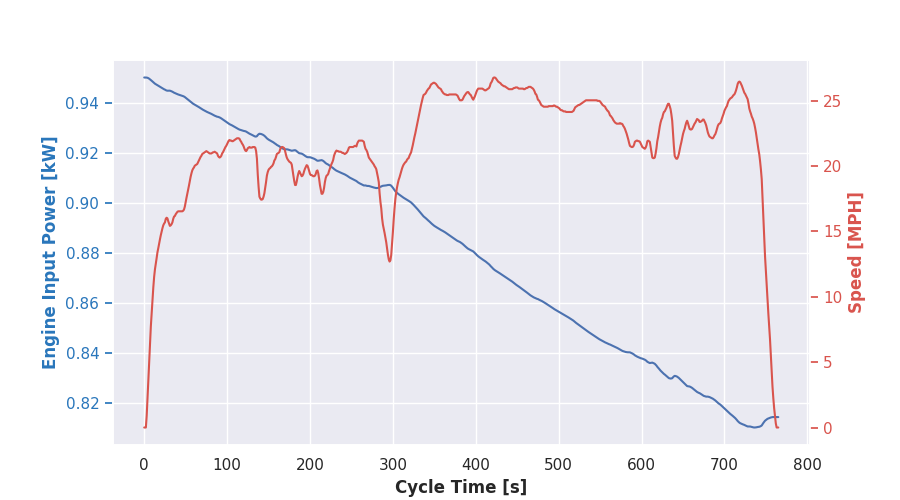